In [1]:
#导入计算依赖的库
import numpy as np
from matplotlib import pyplot as plt
import xlrd
from sklearn import linear_model    #使用sklearn封装的fit进行检验

# 数据的读取及模型的选择

In [2]:
# 从文件中获取数据
ExcelFile=xlrd.open_workbook(r'data.xlsx')
sheet=ExcelFile.sheet_by_index(0)
cols_1=sheet.col_values(0)
cols_2=sheet.col_values(1)

In [3]:
# 剔除数据的表头
x=np.array(cols_1[1:])
y=np.array(cols_2[1:])
print("获取的节点如下:")
print(x)
print("节点处的值对应如下:")
print(y)

获取的节点如下:
[2.  4.  4.  4.6 5.  5.2 5.6 6.  6.6 7. ]
节点处的值对应如下:
[5.  3.5 3.  2.7 2.4 2.5 2.  1.5 1.2 1.2]


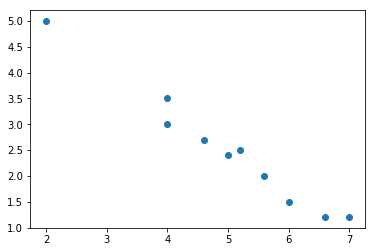

In [4]:
#绘制散点图，选择拟合模型
plt.scatter(x,y)

通过观察上图选择线性模型$y=a+bx$进行拟合

# 模型求解

求解的一次式$y=a+bx$需要满足总误差Q最小,其中：
$$Q=\sum_{i=1}^{N}\left[y_{i}-\left(a+b x_{i}\right)\right]^{2}$$
根据求极值的方法知，使$Q$取得极值时的$a,b$满足:
$$\frac{\partial Q}{\partial a}=0, \quad \frac{\partial Q}{\partial b}=0$$
即满足：
$$\left\{\begin{array}{l}{a N+b \sum x_{i}=\sum y_{i}} \\ {a \sum x_{i}+b \sum x_{i}^{2}=\sum x_{i} y_{i}}\end{array}\right.$$
因此问题转化为求解上面的线性方程组，其中$a,b$为未知数

In [5]:
#编写求解上述线性方程组的函数，返回求解的结果为a,b的值
def linearfit(x,y):
    #构造系数矩阵A
    A=[]
    A.append(len(x))
    A.append(sum(x))
    A.append(sum(x))
    A.append(sum(x*x))
    A=np.array(A).reshape(2,2)
    #构造矩阵b
    b=[]
    b.append(sum(y))
    b.append(sum(x*y))
    b=np.array(b).reshape(2,1)
    #求解线性方程组，返回结果
    return np.linalg.inv(A).dot(b)

In [6]:
ans=linearfit(x,y)
print("得到的拟合直线方程为:\t"+"y="+str(ans[(0,0)])+"+("+str(ans[(1,0)])+"*x)")

得到的拟合直线方程为:	y=6.438284518828432+(-0.7876569037656873*x)


In [7]:
x_=np.arange(0,8,1)
y_=ans[(0,0)]+ans[(1,0)]*x_

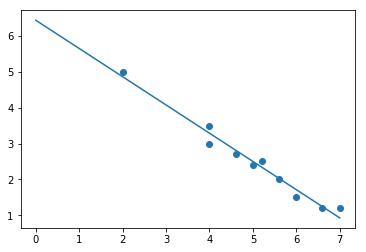

In [8]:
#绘制拟合的结果
plt.scatter(x,y)
plt.plot(x_,y_)
plt.show()

# 结果分析

## 计算残差平方和

In [9]:
print(sum((y-(ans[(0,0)]+ans[(1,0)]*x))*(y-(ans[(0,0)]+ans[(1,0)]*x))))

0.3178870292887031


## 使用sklearn计算作为标准结果

In [10]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print('sklearn计算得到一元线性方程为: '+'\ty' + '=' + str(clf.intercept_[0])+"+("+str(clf.coef_[0][0]) + '*x)')

sklearn计算得到一元线性方程为: 	y=6.438284518828452+(-0.7876569037656904*x)
